In [20]:
import pymongo
import pandas as pd
import datetime
import pprint

In [2]:
# Set up MongoDB client
client = pymongo.MongoClient('mongodb://localhost:27017/')
db_name = "posts"

db = client[db_name]
post = {"author": "Mike",
        "text": "My first blog post!",
        "tags": ["mongodb", "python", "pymongo"],
        "date": datetime.datetime.utcnow()
       }

posts = db.posts
post_id = posts.insert_one(post).inserted_id

print("Document ID: ", post_id)

Document ID:  639b6ea13d74349bbdf1112c


In [22]:
shows = pd.read_csv('data/Best Shows Netflix.csv', index_col=0)
show_yr = pd.read_csv('data/Best Show by Year Netflix.csv', index_col=0)
movies = pd.read_csv('data/Best Movies Netflix.csv', index_col=0)
movie_yr = pd.read_csv('data/Best Movie by Year Netflix.csv', index_col=0)
credits = pd.read_csv('data/raw_credits.csv', index_col=0)
titles = pd.read_csv('data/raw_titles.csv', index_col=0)

dfs = [shows, show_yr, movies, movie_yr, credits, titles]
dfs_names = ["shows", "show_yr", "movies", "movie_yr", "credits", "titles"]

In [24]:
for i in range(len(dfs)):
    print(f'len({dfs_names[i]}): {len(dfs[i])}')
    print(f'{dfs_names[i]}.columns: {dfs[i].columns}')

len(shows): 246
shows.columns: Index(['TITLE', 'RELEASE_YEAR', 'SCORE', 'NUMBER_OF_VOTES', 'DURATION',
       'NUMBER_OF_SEASONS', 'MAIN_GENRE', 'MAIN_PRODUCTION'],
      dtype='object')
len(show_yr): 31
show_yr.columns: Index(['TITLE', 'RELEASE_YEAR', 'SCORE', 'NUMBER_OF_SEASONS', 'MAIN_GENRE',
       'MAIN_PRODUCTION'],
      dtype='object')
len(movies): 387
movies.columns: Index(['TITLE', 'RELEASE_YEAR', 'SCORE', 'NUMBER_OF_VOTES', 'DURATION',
       'MAIN_GENRE', 'MAIN_PRODUCTION'],
      dtype='object')
len(movie_yr): 49
movie_yr.columns: Index(['TITLE', 'RELEASE_YEAR', 'SCORE', 'MAIN_GENRE', 'MAIN_PRODUCTION'], dtype='object')
len(credits): 77213
credits.columns: Index(['person_id', 'id', 'name', 'character', 'role'], dtype='object')
len(titles): 5806
titles.columns: Index(['id', 'title', 'type', 'release_year', 'age_certification', 'runtime',
       'genres', 'production_countries', 'seasons', 'imdb_id', 'imdb_score',
       'imdb_votes'],
      dtype='object')


In [32]:
credits.where(credits.role=='ACTOR').value_counts('name')

name
Shah Rukh Khan         30
Boman Irani            25
Kareena Kapoor Khan    25
Anupam Kher            25
Takahiro Sakurai       22
                       ..
Irene Tsu               1
Irene Wood              1
Irene Ziegler           1
Irene Zisblatt          1
조경이                     1
Length: 50723, dtype: int64

In [43]:
titles.where(titles.type == 'SHOW').value_counts('title').head(8)

title
Chosen          2
The Good Cop    2
Kakegurui       2
Top Boy         2
Cowboy Bebop    2
Danger Mouse    2
The Club        2
Sex/Life        1
dtype: int64

<AxesSubplot: >

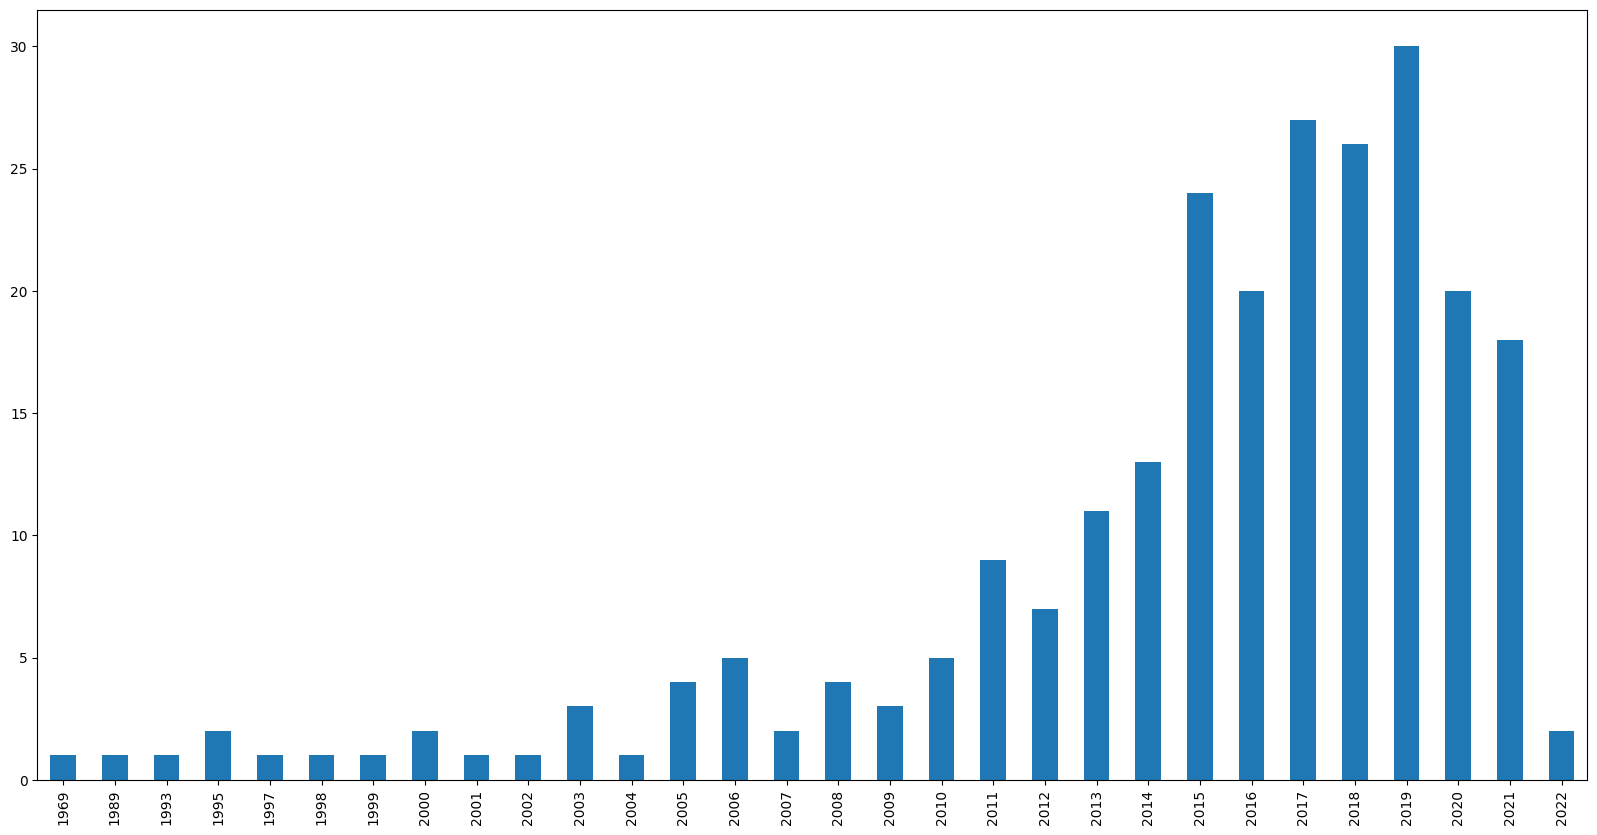

In [11]:
shows.RELEASE_YEAR.value_counts().sort_index().plot(kind='bar', figsize=(20,10))

<AxesSubplot: >

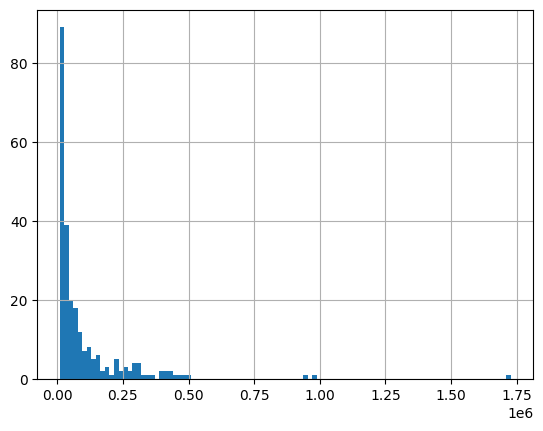

In [5]:
shows.NUMBER_OF_VOTES.hist(bins=100)

In [18]:
shows_recent = shows.where(shows.RELEASE_YEAR >= 2015).dropna()
shows_popular = shows_recent.where(shows_recent.NUMBER_OF_VOTES >= 10000).dropna()
shows_popular.where(shows_popular.RELEASE_YEAR == 2021).where(shows_popular.MAIN_PRODUCTION == 'US').sort_values(by='NUMBER_OF_VOTES', ascending=False).head(10)

,TITLE,RELEASE_YEAR,SCORE,NUMBER_OF_VOTES,DURATION,NUMBER_OF_SEASONS,MAIN_GENRE,MAIN_PRODUCTION
index,,,,,,,,
5,Arcane,2021.0,9.1,175412.0,41.0,1.0,action,US
182,Midnight Mass,2021.0,7.7,102321.0,64.0,1.0,action,US
201,Shadow and Bone,2021.0,7.6,77782.0,52.0,1.0,scifi,US
73,Maid,2021.0,8.4,74955.0,54.0,1.0,drama,US
163,Sweet Tooth,2021.0,7.8,49182.0,45.0,2.0,scifi,US
233,Night Stalker: The Hunt for a Serial Killer,2021.0,7.5,23939.0,47.0,1.0,crime,US
175,DOTA: Dragon's Blood,2021.0,7.8,17429.0,26.0,2.0,scifi,US
235,True Story,2021.0,7.5,16927.0,39.0,1.0,drama,US
195,Inside Job,2021.0,7.6,15137.0,28.0,1.0,comedy,US


<AxesSubplot: >

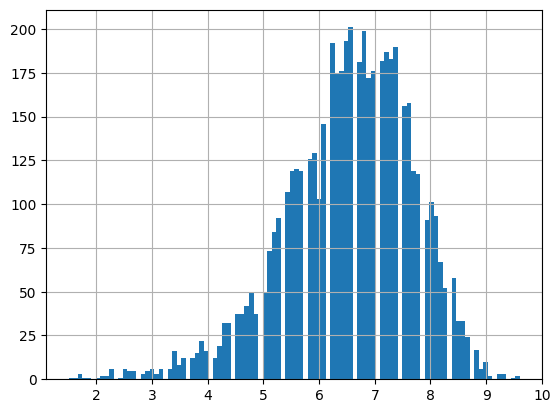

In [25]:
# plot titles.imdb_score
titles.imdb_score.hist(bins=100)

In [26]:
# join titles and shows
shows_titles = shows.join(titles.set_index('title'), on='TITLE')

In [28]:
shows_titles.sort_values(by='imdb_score', ascending=False).head(10)

,TITLE,RELEASE_YEAR,SCORE,NUMBER_OF_VOTES,DURATION,NUMBER_OF_SEASONS,MAIN_GENRE,MAIN_PRODUCTION,id,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes
index,,,,,,,,,,,,,,,,,,,
0,Breaking Bad,2008,9.5,1727694,48,5,drama,US,ts4,SHOW,2008,TV-MA,48,"['drama', 'thriller', 'crime']",['US'],5.0,tt0903747,9.5,1727694.0
3,Kota Factory,2019,9.3,66985,42,2,drama,IN,ts90621,SHOW,2019,TV-MA,42,"['drama', 'comedy']",['IN'],2.0,tt9432978,9.3,66985.0
1,Avatar: The Last Airbender,2005,9.3,297336,24,3,scifi,US,ts3371,SHOW,2005,TV-Y7,24,"['scifi', 'family', 'fantasy', 'animation', 'a...",['US'],3.0,tt0417299,9.3,297336.0
2,Our Planet,2019,9.3,41386,50,1,documentary,GB,ts85398,SHOW,2019,TV-G,50,['documentation'],['GB'],1.0,tt9253866,9.3,41386.0
5,Arcane,2021,9.1,175412,41,1,action,US,ts222333,SHOW,2021,TV-14,41,"['action', 'scifi', 'drama', 'fantasy', 'anima...",['US'],1.0,tt11126994,9.1,175412.0
4,The Last Dance,2020,9.1,108321,50,1,documentary,US,ts81120,SHOW,2020,TV-MA,50,"['documentation', 'history', 'sport']",['US'],1.0,tt8420184,9.1,108321.0
6,Attack on Titan,2013,9.0,325381,24,4,scifi,JP,ts20682,SHOW,2013,TV-MA,24,"['scifi', 'action', 'drama', 'fantasy', 'horro...",['JP'],4.0,tt2560140,9.0,325381.0
8,DEATH NOTE,2006,9.0,302147,24,1,scifi,JP,ts11313,SHOW,2006,TV-14,24,"['scifi', 'animation', 'crime', 'drama', 'fant...",['JP'],1.0,tt0877057,9.0,302147.0
7,Hunter x Hunter,2011,9.0,87857,23,3,drama,JP,ts32835,SHOW,2011,TV-14,23,"['drama', 'action', 'comedy', 'crime', 'animat...",['JP'],3.0,tt2098220,9.0,87857.0


In [23]:
shows = pd.read_csv('data/Best Shows Netflix.csv', index_col=0)
show_yr = pd.read_csv('data/Best Show by Year Netflix.csv', index_col=0)
movies = pd.read_csv('data/Best Movies Netflix.csv', index_col=0)
movie_yr = pd.read_csv('data/Best Movie by Year Netflix.csv', index_col=0)
credits = pd.read_csv('data/raw_credits.csv', index_col=0)
titles = pd.read_csv('data/raw_titles.csv', index_col=0)
dfs = [shows, show_yr, movies, movie_yr, credits, titles]

# remove irrelevant data (not from 2017-2022)
shows = shows.where(shows.RELEASE_YEAR >= 2017).dropna()[['TITLE', 'SCORE', 'RELEASE_YEAR']].reset_index(drop=True)
movies = movies.where(movies.RELEASE_YEAR >= 2017).dropna()[['TITLE', 'SCORE', 'RELEASE_YEAR']].reset_index(drop=True)
show_yr = show_yr.where(show_yr.RELEASE_YEAR >= 2017).dropna()[['TITLE', 'SCORE', 'RELEASE_YEAR']].reset_index(drop=True)
movie_yr = movie_yr.where(movie_yr.RELEASE_YEAR >= 2017).dropna()[['TITLE', 'SCORE', 'RELEASE_YEAR']].reset_index(drop=True)

client = pymongo.MongoClient('mongodb://localhost:27017/')
db_name = "netflix"
db = client[db_name]

# clear collections
db.shows.drop()
db.movies.drop()
db.show_yr.drop()
db.movie_yr.drop()

# add data to MongoDB
db.shows.insert_many(shows.to_dict('records'))
db.movies.insert_many(movies.to_dict('records'))
db.show_yr.insert_many(show_yr.to_dict('records'))
db.movie_yr.insert_many(movie_yr.to_dict('records'))

In [24]:
# view data in MongoDB
for movie in db.movie_yr.find():
    pprint.pprint(movie)

{'RELEASE_YEAR': 2017.0,
 'SCORE': 8.2,
 'TITLE': 'Bāhubali 2: The Conclusion',
 '_id': ObjectId('639bbbafe7de29d78d832529')}
{'RELEASE_YEAR': 2018.0,
 'SCORE': 8.2,
 'TITLE': 'Andhadhun',
 '_id': ObjectId('639bbbafe7de29d78d83252a')}
{'RELEASE_YEAR': 2019.0,
 'SCORE': 8.4,
 'TITLE': 'Dave Chappelle: Sticks & Stones',
 '_id': ObjectId('639bbbafe7de29d78d83252b')}
{'RELEASE_YEAR': 2020.0,
 'SCORE': 9.0,
 'TITLE': 'David Attenborough: A Life on Our Planet',
 '_id': ObjectId('639bbbafe7de29d78d83252c')}
{'RELEASE_YEAR': 2021.0,
 'SCORE': 8.7,
 'TITLE': 'Bo Burnham: Inside',
 '_id': ObjectId('639bbbafe7de29d78d83252d')}
{'RELEASE_YEAR': 2022.0,
 'SCORE': 7.2,
 'TITLE': 'The Tinder Swindler',
 '_id': ObjectId('639bbbafe7de29d78d83252e')}


In [10]:
shows.reset_index(drop=True)

,TITLE,SCORE,RELEASE_YEAR
0,Our Planet,9.3,2019.0
1,Kota Factory,9.3,2019.0
2,The Last Dance,9.1,2020.0
3,Arcane,9.1,2021.0
4,Heartstopper,8.9,2022.0
...,...,...,...
118,Evil Genius,7.5,2018.0
119,13 Reasons Why,7.5,2017.0
120,Lupin,7.5,2021.0
121,All of Us Are Dead,7.5,2022.0


In [50]:
show_yr[['TITLE', 'SCORE']]

,TITLE,SCORE
index,,
25,Anne with an E,8.7
26,Cobra Kai,8.6
27,Kota Factory,9.3
28,The Last Dance,9.1
29,Arcane,9.1
30,Heartstopper,8.9


In [39]:
year = 2020
num = 5
for movie in db.movies.find({'RELEASE_YEAR': year}, {'_id': 0, 'TITLE': 1, 'SCORE': 1}).sort('rating', -1).limit(num):
    pprint.pprint(movie)

{'SCORE': 7.7, 'TITLE': 'The Trial of the Chicago 7'}
{'SCORE': 7.6, 'TITLE': 'Athlete A'}
{'SCORE': 9.0, 'TITLE': 'David Attenborough: A Life on Our Planet'}
{'SCORE': 8.1, 'TITLE': 'My Octopus Teacher'}
{'SCORE': 7.6, 'TITLE': 'The Social Dilemma'}


In [41]:
for i, movie in enumerate(db.movies.find({'RELEASE_YEAR': year}, {'_id': 0, 'TITLE': 1, 'SCORE': 1}).sort('rating', -1).limit(num)):
    print(f'{i+1}. {movie["TITLE"]}: {movie["SCORE"]}')

1. The Trial of the Chicago 7: 7.7
2. Athlete A: 7.6
3. David Attenborough: A Life on Our Planet: 9.0
4. My Octopus Teacher: 8.1
5. The Social Dilemma: 7.6


In [48]:
num = 5
f'The top{" 5" if num == 5 else ""} movie{"s" if num == 5 else ""} from the past 5 years {"are" if num == 5 else "is"}:'

'The top 5 movies from the past 5 years are:'

In [51]:
import re
original = 'What were the top movies in 2020'
if re.search(r'[0-9]{4}', original):
    year = int(re.search(r'[0-9]{4}', original).group())

In [52]:
year

2020